# ABIDE GLM VISU
Show the brains under different conditions

In [89]:
import os
import numpy as np
import nibabel as nib
import nilearn as nil
from nilearn import plotting
from matplotlib import pyplot as plt
from matplotlib import gridspec as mg

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [29]:
# Paths
in_path = '/data1/scores/glm/abide/volumes'
out_path = '/data1/scores/glm/abide/figures'
temp_path = '/data1/cambridge/template/template_cambridge_basc_multiscale_sym_scale007_stacked.nii.gz'
in_file = 'c_age_n_4_scores_target.nii.gz'
in_anat = '/data1/templates/MNI152_T1_1mm_brain.nii.gz'
template = 'c_{}_n_{}_{}_{}.nii.gz'

In [15]:
contrasts = ['sex',
             'diag',
             'age',
             'mean_fd']
use = ['target', 'time']
networks = np.arange(1,8)

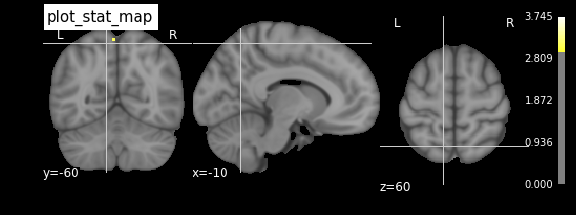

In [15]:
plotting.plot_stat_map(os.path.join(in_path ,in_file), bg_img=in_anat,
                       threshold=3, title="plot_stat_map",
                       cut_coords=(-10, -60, 60))

The plan here is to have the 

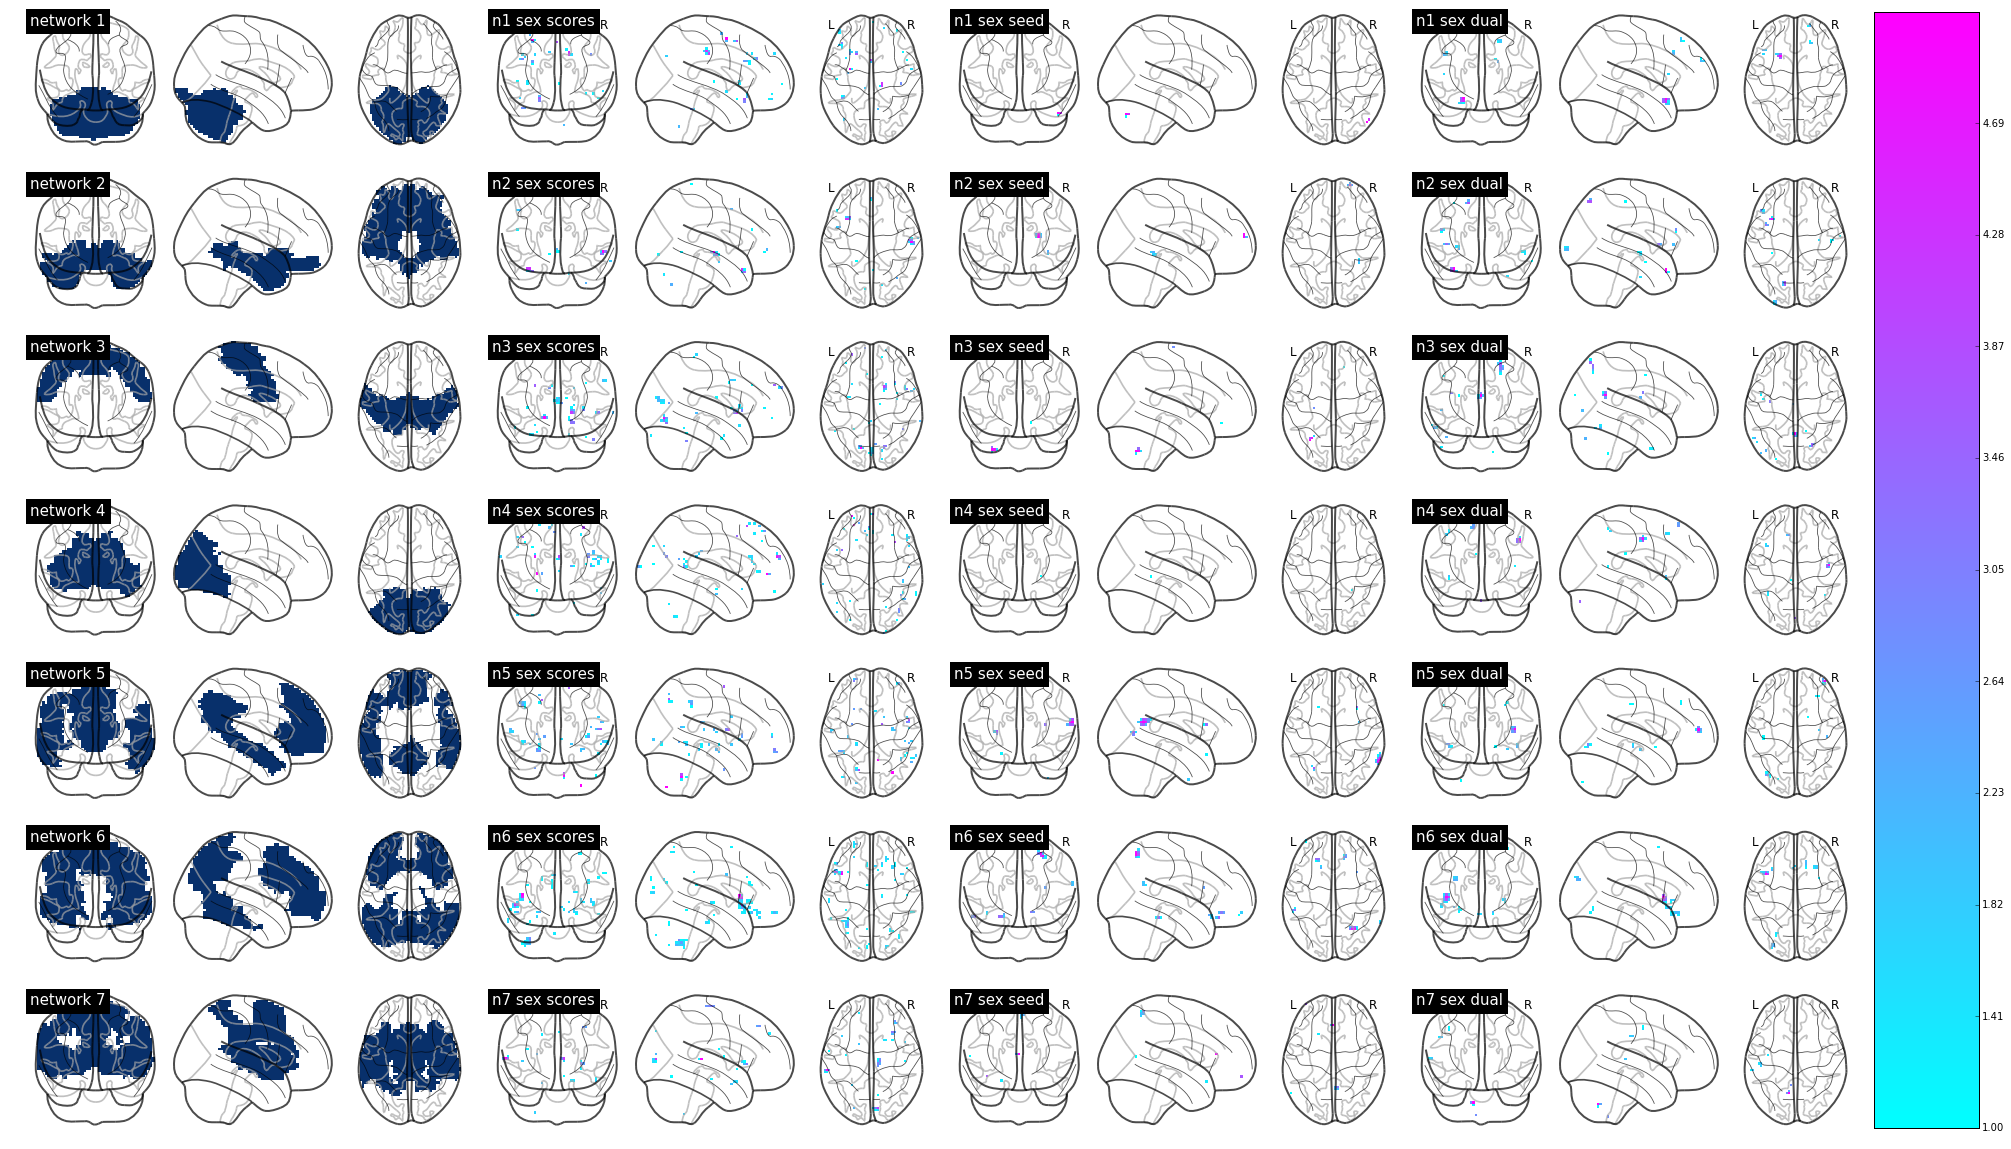

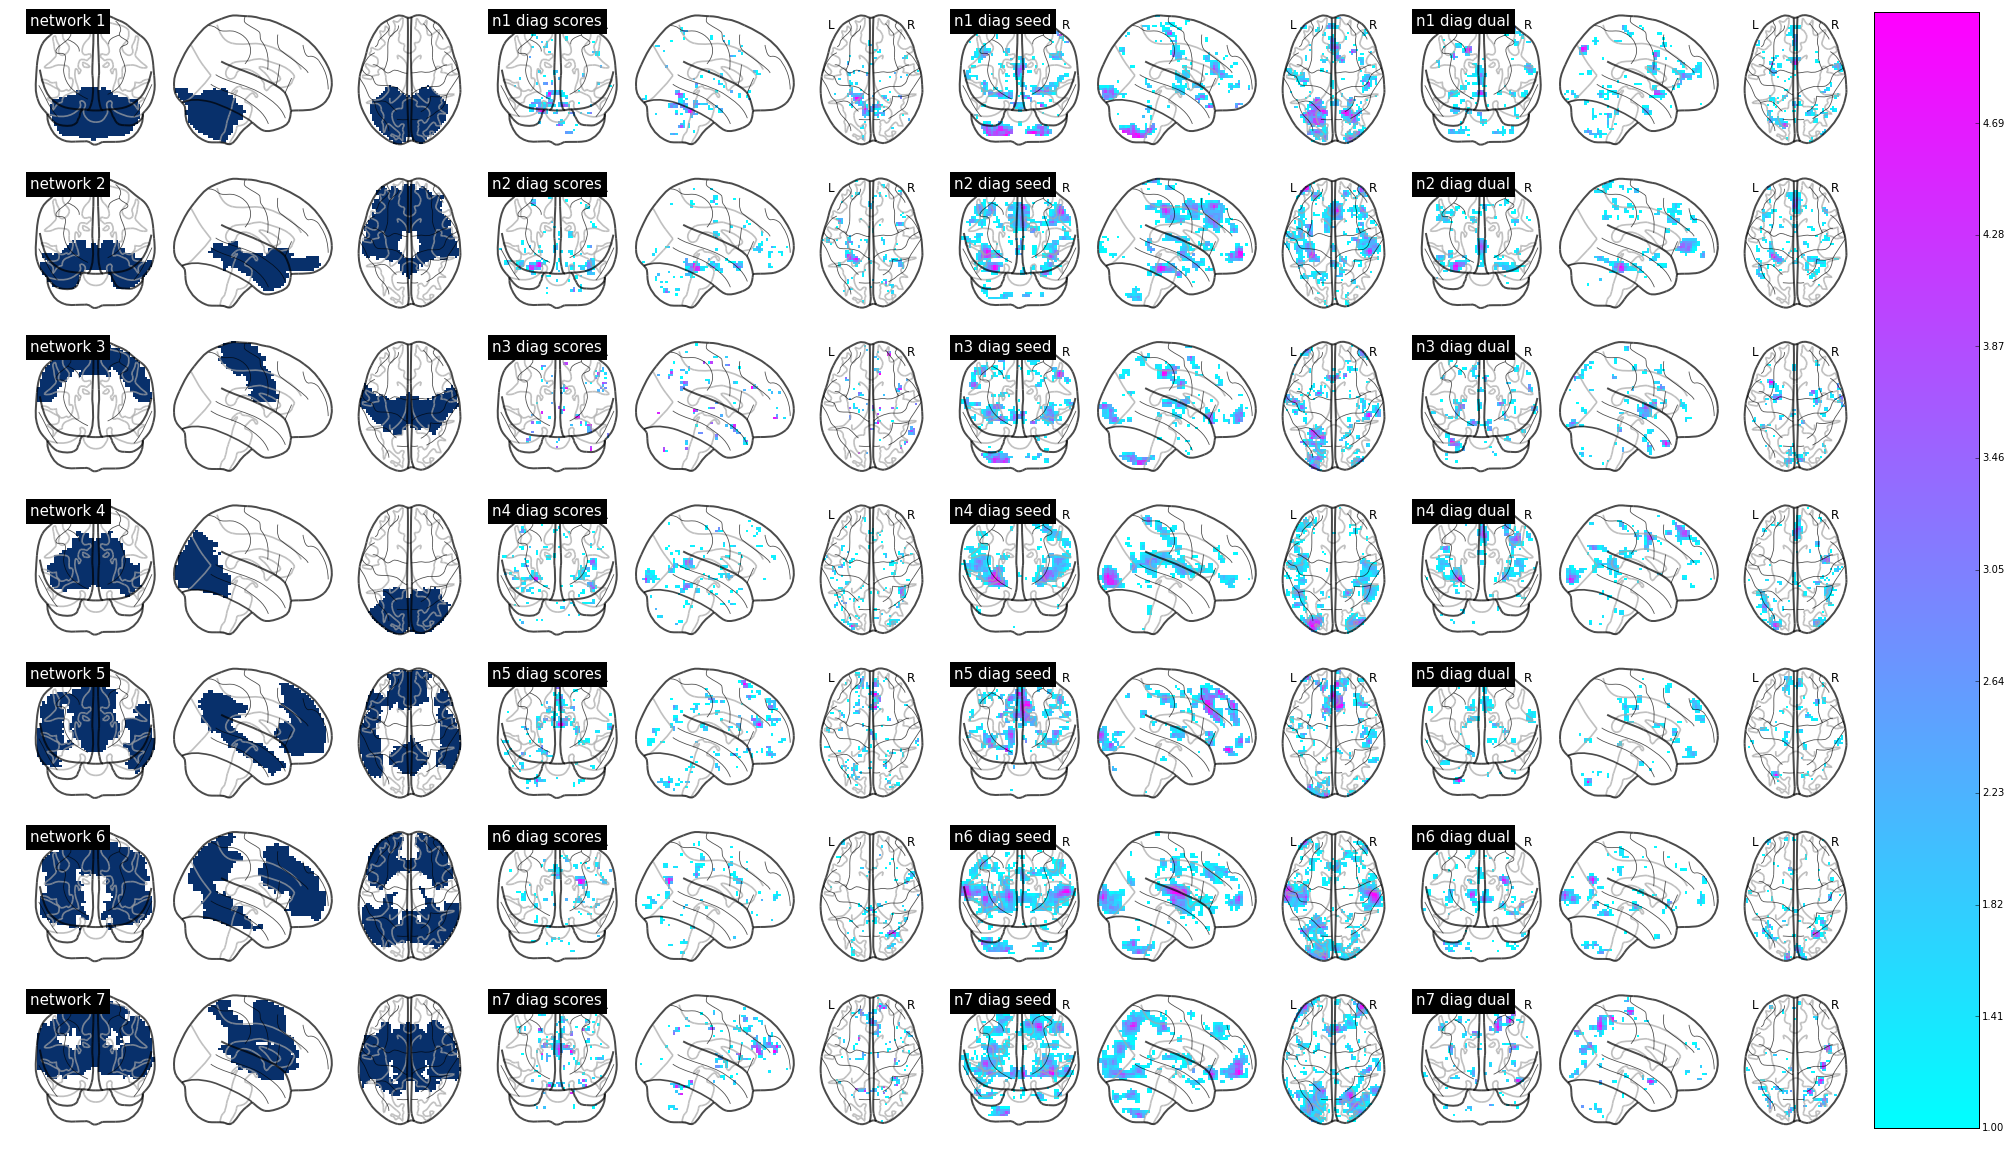

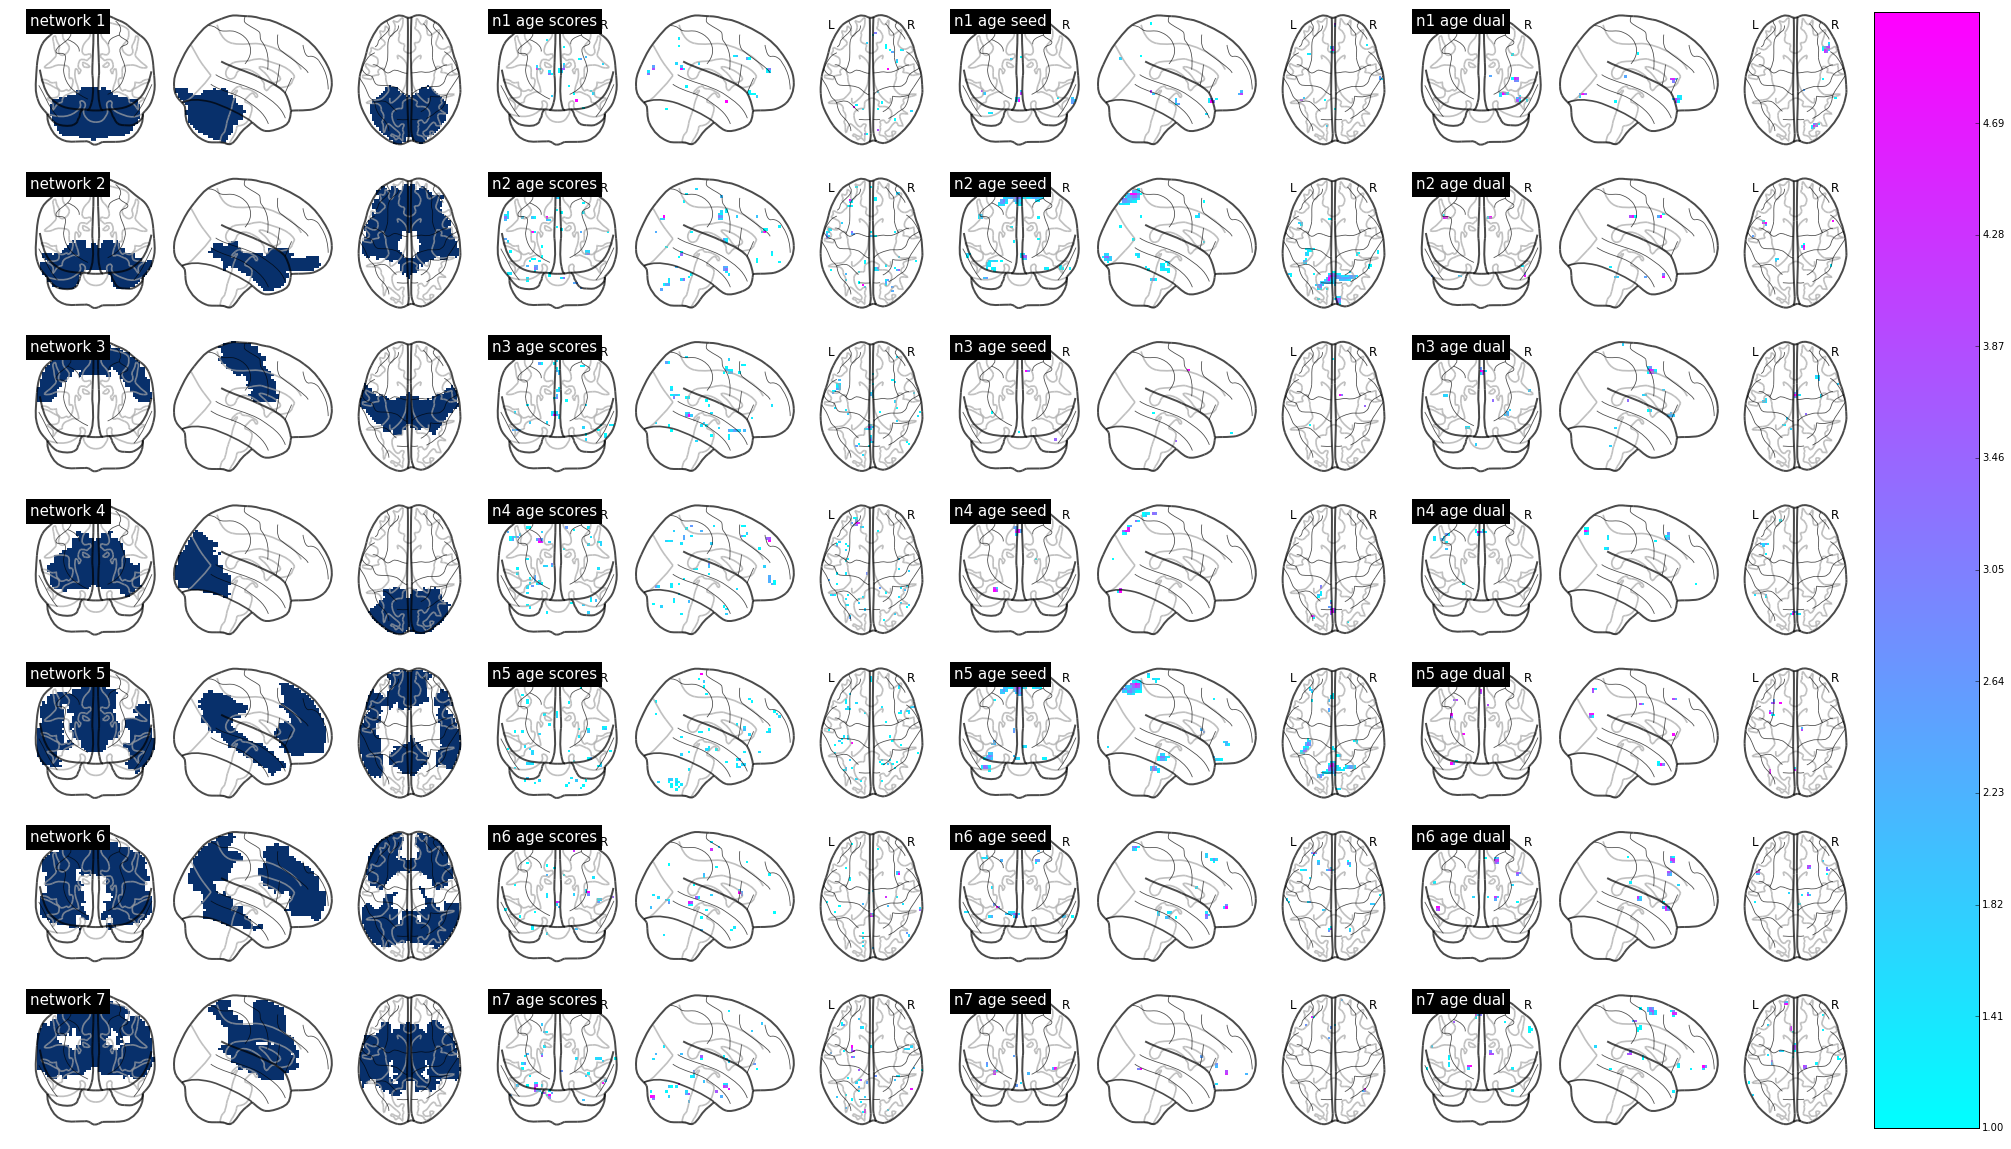

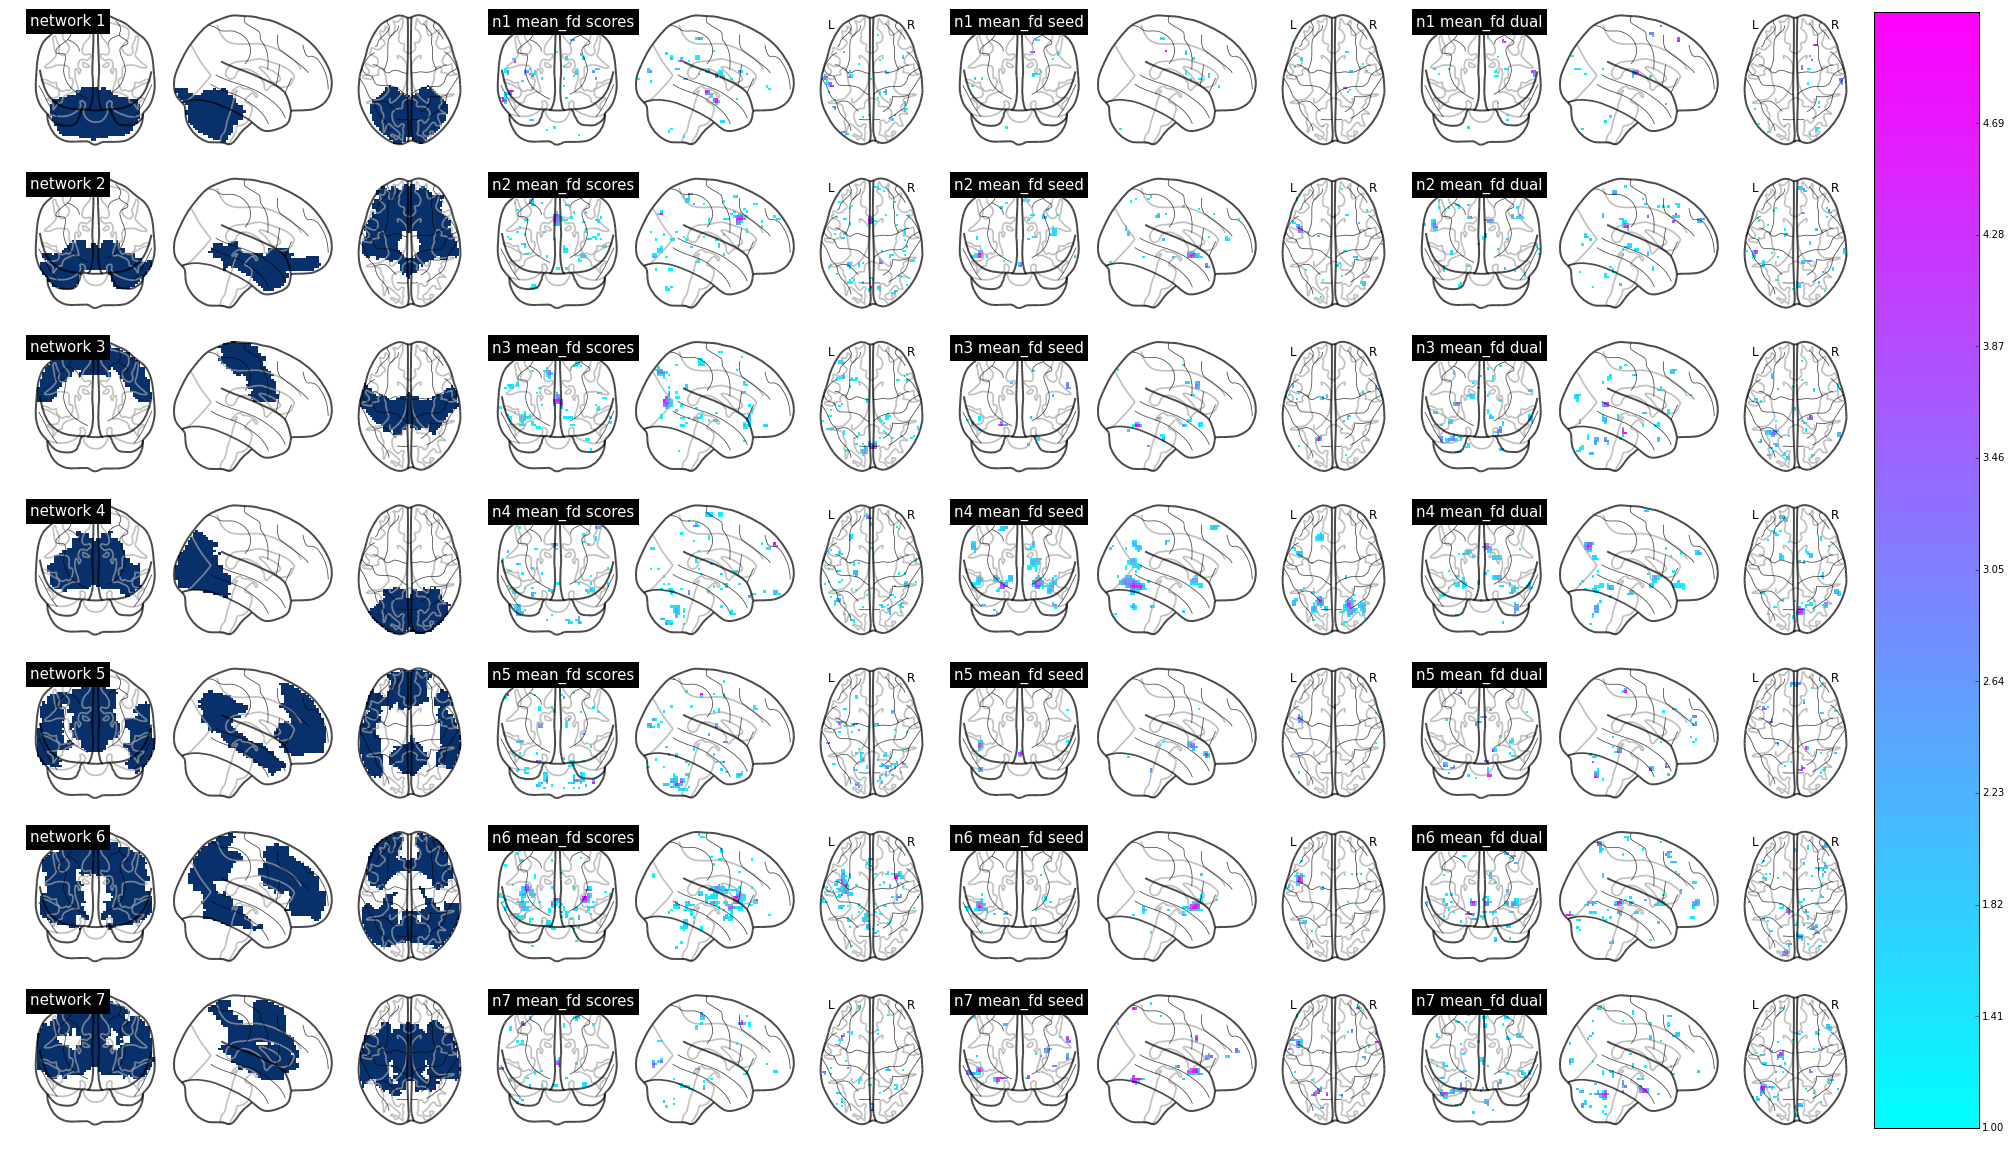

In [111]:
use  = 'time'
for contrast in contrasts:
    #contrast = 'age'
    f = plt.figure(figsize=(35,20))
    i_name = 'overview_{}.png'.format(contrast)
    i_path = os.path.join(out_path, i_name)
    for nid, net in enumerate(networks):
        f_scores = template.format(contrast, net, 'scores', use)
        p_scores = os.path.join(in_path, f_scores)
        f_seed = template.format(contrast, net, 'seed', use)
        p_seed = os.path.join(in_path, f_seed)
        f_dual = template.format(contrast, net, 'dual', use)
        p_dual = os.path.join(in_path, f_dual)
        # Got the files, now display them        
        
        gs = mg.GridSpec(7, 17, wspace=0.1)    
        # 0 to 3
        ax_net = f.add_subplot(gs[nid,0:4])
        plotting.plot_glass_brain(nil.image.index_img(temp_path, nid), 
                                  title='network {}'.format(net), vmin=-0.5, vmax=0.5,
                                  axes=ax_net, annotate=False, cmap=cm.Blues)

        # 4 to 7
        ax_scores = f.add_subplot(gs[nid,4:8])
        plotting.plot_glass_brain(p_scores, title='n{} {} scores'.format(net, contrast),
                                  threshold=3, axes=ax_scores, cmap=cm.cool)

        ax_seed = f.add_subplot(gs[nid,8:12])
        plotting.plot_glass_brain(p_seed, title='n{} {} seed'.format(net, contrast),
                                  threshold=3, axes=ax_seed, cmap=cm.cool)

        ax_dual = f.add_subplot(gs[nid,12:16])
        plotting.plot_glass_brain(p_dual, title='n{} {} dual'.format(net, contrast),
                                  threshold=3, axes=ax_dual, cmap=cm.cool)

    ax_color = f.add_subplot(gs[:,16])
    Z = [[0,0],[0,0]]
    levels = np.arange(1,5.1,0.001)
    cl = plt.contourf(Z, levels, cmap=cm.cool)
    f.colorbar(cl, cax=ax_color)
    f.savefig(i_path, bbox_inches='tight')

## Now do this for the F-Test

In [112]:
f_temp = 'f_test_n_{}_{}_{}.nii.gz'

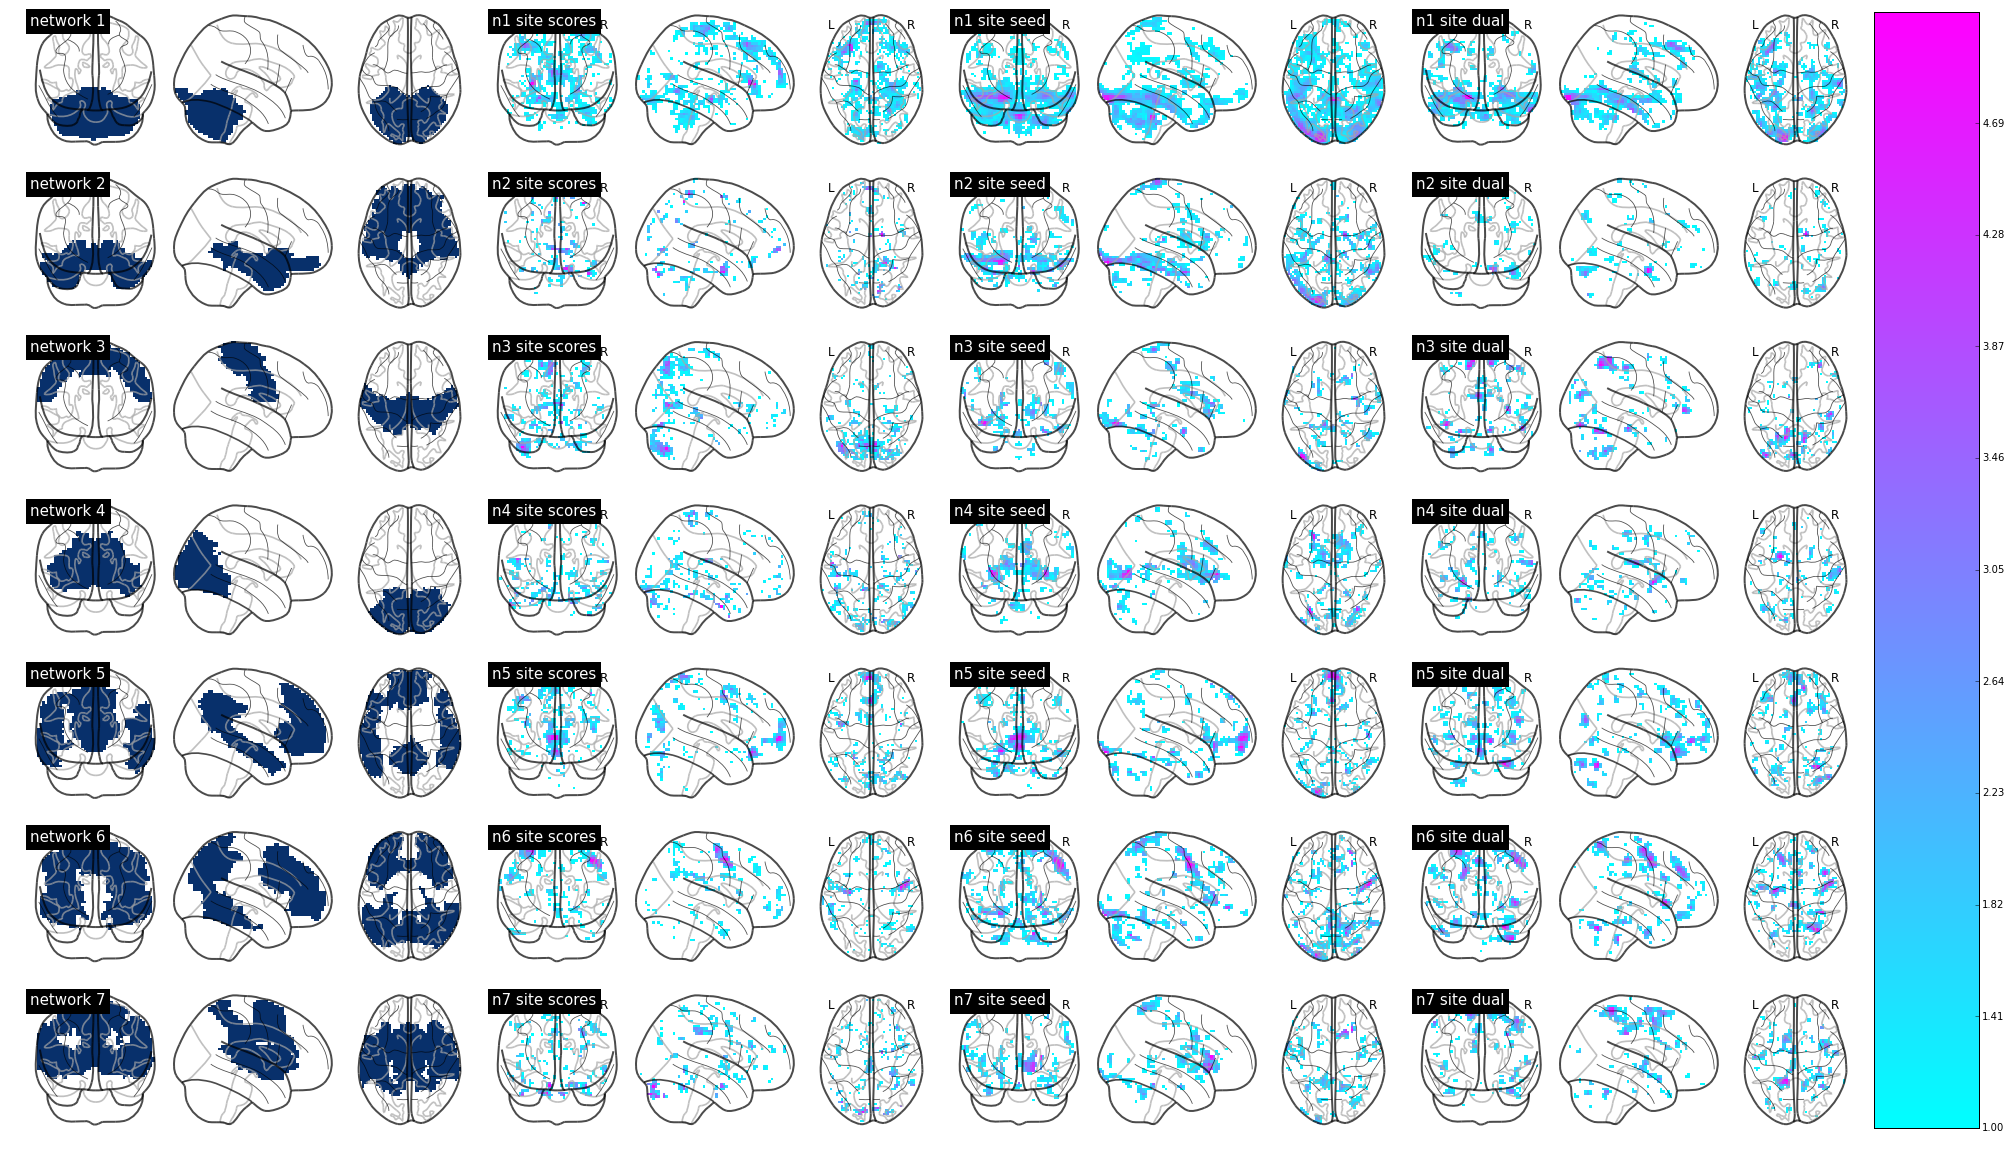

In [115]:
use  = 'time'
f = plt.figure(figsize=(35,20))
i_name = 'overview_site.png'
site_i_path = os.path.join(out_path, i_name)
for nid, net in enumerate(networks):
    f_scores = f_temp.format(net, 'scores', use)
    p_scores = os.path.join(in_path, f_scores)
    f_seed = f_temp.format(net, 'seed', use)
    p_seed = os.path.join(in_path, f_seed)
    f_dual = f_temp.format(net, 'dual', use)
    p_dual = os.path.join(in_path, f_dual)
    # Got the files, now display them        

    gs = mg.GridSpec(7, 17, wspace=0.1)    
    # 0 to 3
    ax_net = f.add_subplot(gs[nid,0:4])
    plotting.plot_glass_brain(nil.image.index_img(temp_path, nid), 
                              title='network {}'.format(net), vmin=-0.5, vmax=0.5,
                              axes=ax_net, annotate=False, cmap=cm.Blues)

    # 4 to 7
    ax_scores = f.add_subplot(gs[nid,4:8])
    plotting.plot_glass_brain(p_scores, title='n{} site scores'.format(net, contrast),
                              threshold=3, axes=ax_scores, cmap=cm.cool)

    ax_seed = f.add_subplot(gs[nid,8:12])
    plotting.plot_glass_brain(p_seed, title='n{} site seed'.format(net, contrast),
                              threshold=3, axes=ax_seed, cmap=cm.cool)

    ax_dual = f.add_subplot(gs[nid,12:16])
    plotting.plot_glass_brain(p_dual, title='n{} site dual'.format(net, contrast),
                              threshold=3, axes=ax_dual, cmap=cm.cool)

ax_color = f.add_subplot(gs[:,16])
Z = [[0,0],[0,0]]
levels = np.arange(1,5.1,0.001)
cl = plt.contourf(Z, levels, cmap=cm.cool)
f.colorbar(cl, cax=ax_color)
f.savefig(site_i_path, bbox_inches='tight')

In [116]:
site_i_path

'/data1/scores/glm/abide/figures/overview_site.png'